In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
main_dir="drive/My Drive/Vision/Image Cartoonifier"
os.chdir(main_dir)

Mounted at /content/drive


# **Read Image**

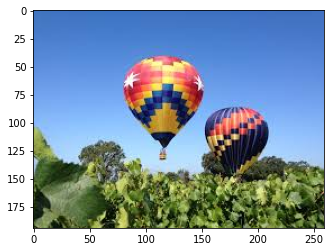

In [13]:
originalImage = cv2.imread('test_image7.jpg')
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
height, width, depth=originalImage.shape
plt.imshow(originalImage)
plt.show()

# Convert the Image to gray **scale**

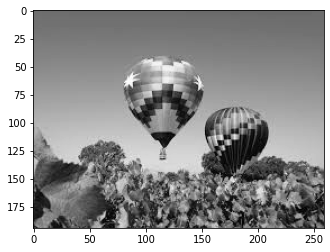

(194, 259)


In [14]:
blackwhiteImage=cv2.cvtColor(originalImage, cv2.COLOR_RGB2GRAY)
plt.imshow(blackwhiteImage, cmap='gray', vmin=0, vmax=255)
plt.show()
print(blackwhiteImage.shape)

# Apply Median **filter**

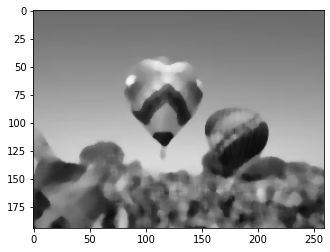

In [15]:
bluredImage=cv2.medianBlur(blackwhiteImage,7)
plt.imshow(bluredImage, cmap='gray', vmin=0, vmax=255)
plt.show()

# Apply Laplacian filter and threshold

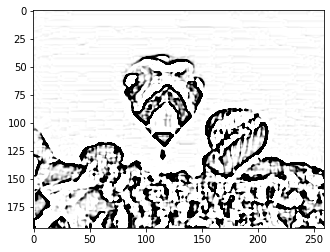

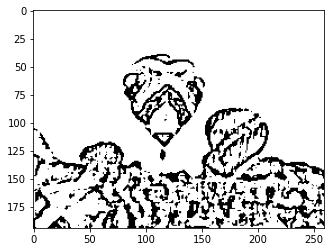

In [16]:
LaplacianImage=cv2.Laplacian(bluredImage,5,ksize=5);
plt.imshow(LaplacianImage, cmap='Greys', vmin=0, vmax=255)
plt.show()
ret,ThresholdImage = cv2.threshold(LaplacianImage,125,255,cv2.THRESH_BINARY)
plt.imshow(ThresholdImage, cmap='Greys', vmin=0, vmax=255)
plt.show()

# Apply Bilateral filter

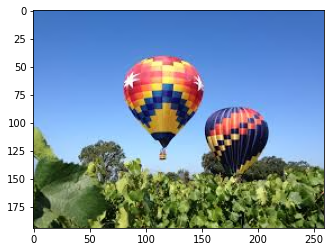

In [17]:
bilateralImage=cv2.bilateralFilter(originalImage,9, 7,9)
plt.imshow(bilateralImage, cmap='gray', vmin=0, vmax=255)
plt.show()

# Overlay the edge mask onto the bilateral filter Image


In [18]:
reshapedbilateralImage= bilateralImage.reshape(height*width,3)
reshapedThresholdImage= ThresholdImage.reshape(height*width,1)


In [19]:
for i in range(reshapedThresholdImage.size):
  if reshapedThresholdImage[i] == 255:
    reshapedbilateralImage[i][0]=0
    reshapedbilateralImage[i][1]=0
    reshapedbilateralImage[i][2]=0

In [20]:
bilateralImage= bilateralImage.reshape(height, width,3)


# Show results

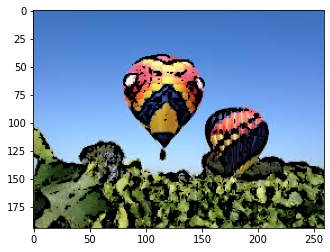

In [21]:
plt.imshow(bilateralImage, cmap='gray', vmin=0, vmax=255)
plt.show()